# Week3: HW2_Kwonsang Jung

### 1) Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = pd.read_csv('Wine.csv')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### 2) Add Labels

In [2]:
wine.columns = ['name', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine.head()

,name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### 3) Check for Missing Values

In [3]:
wine.isnull().sum()

name                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

### 4) Select Features

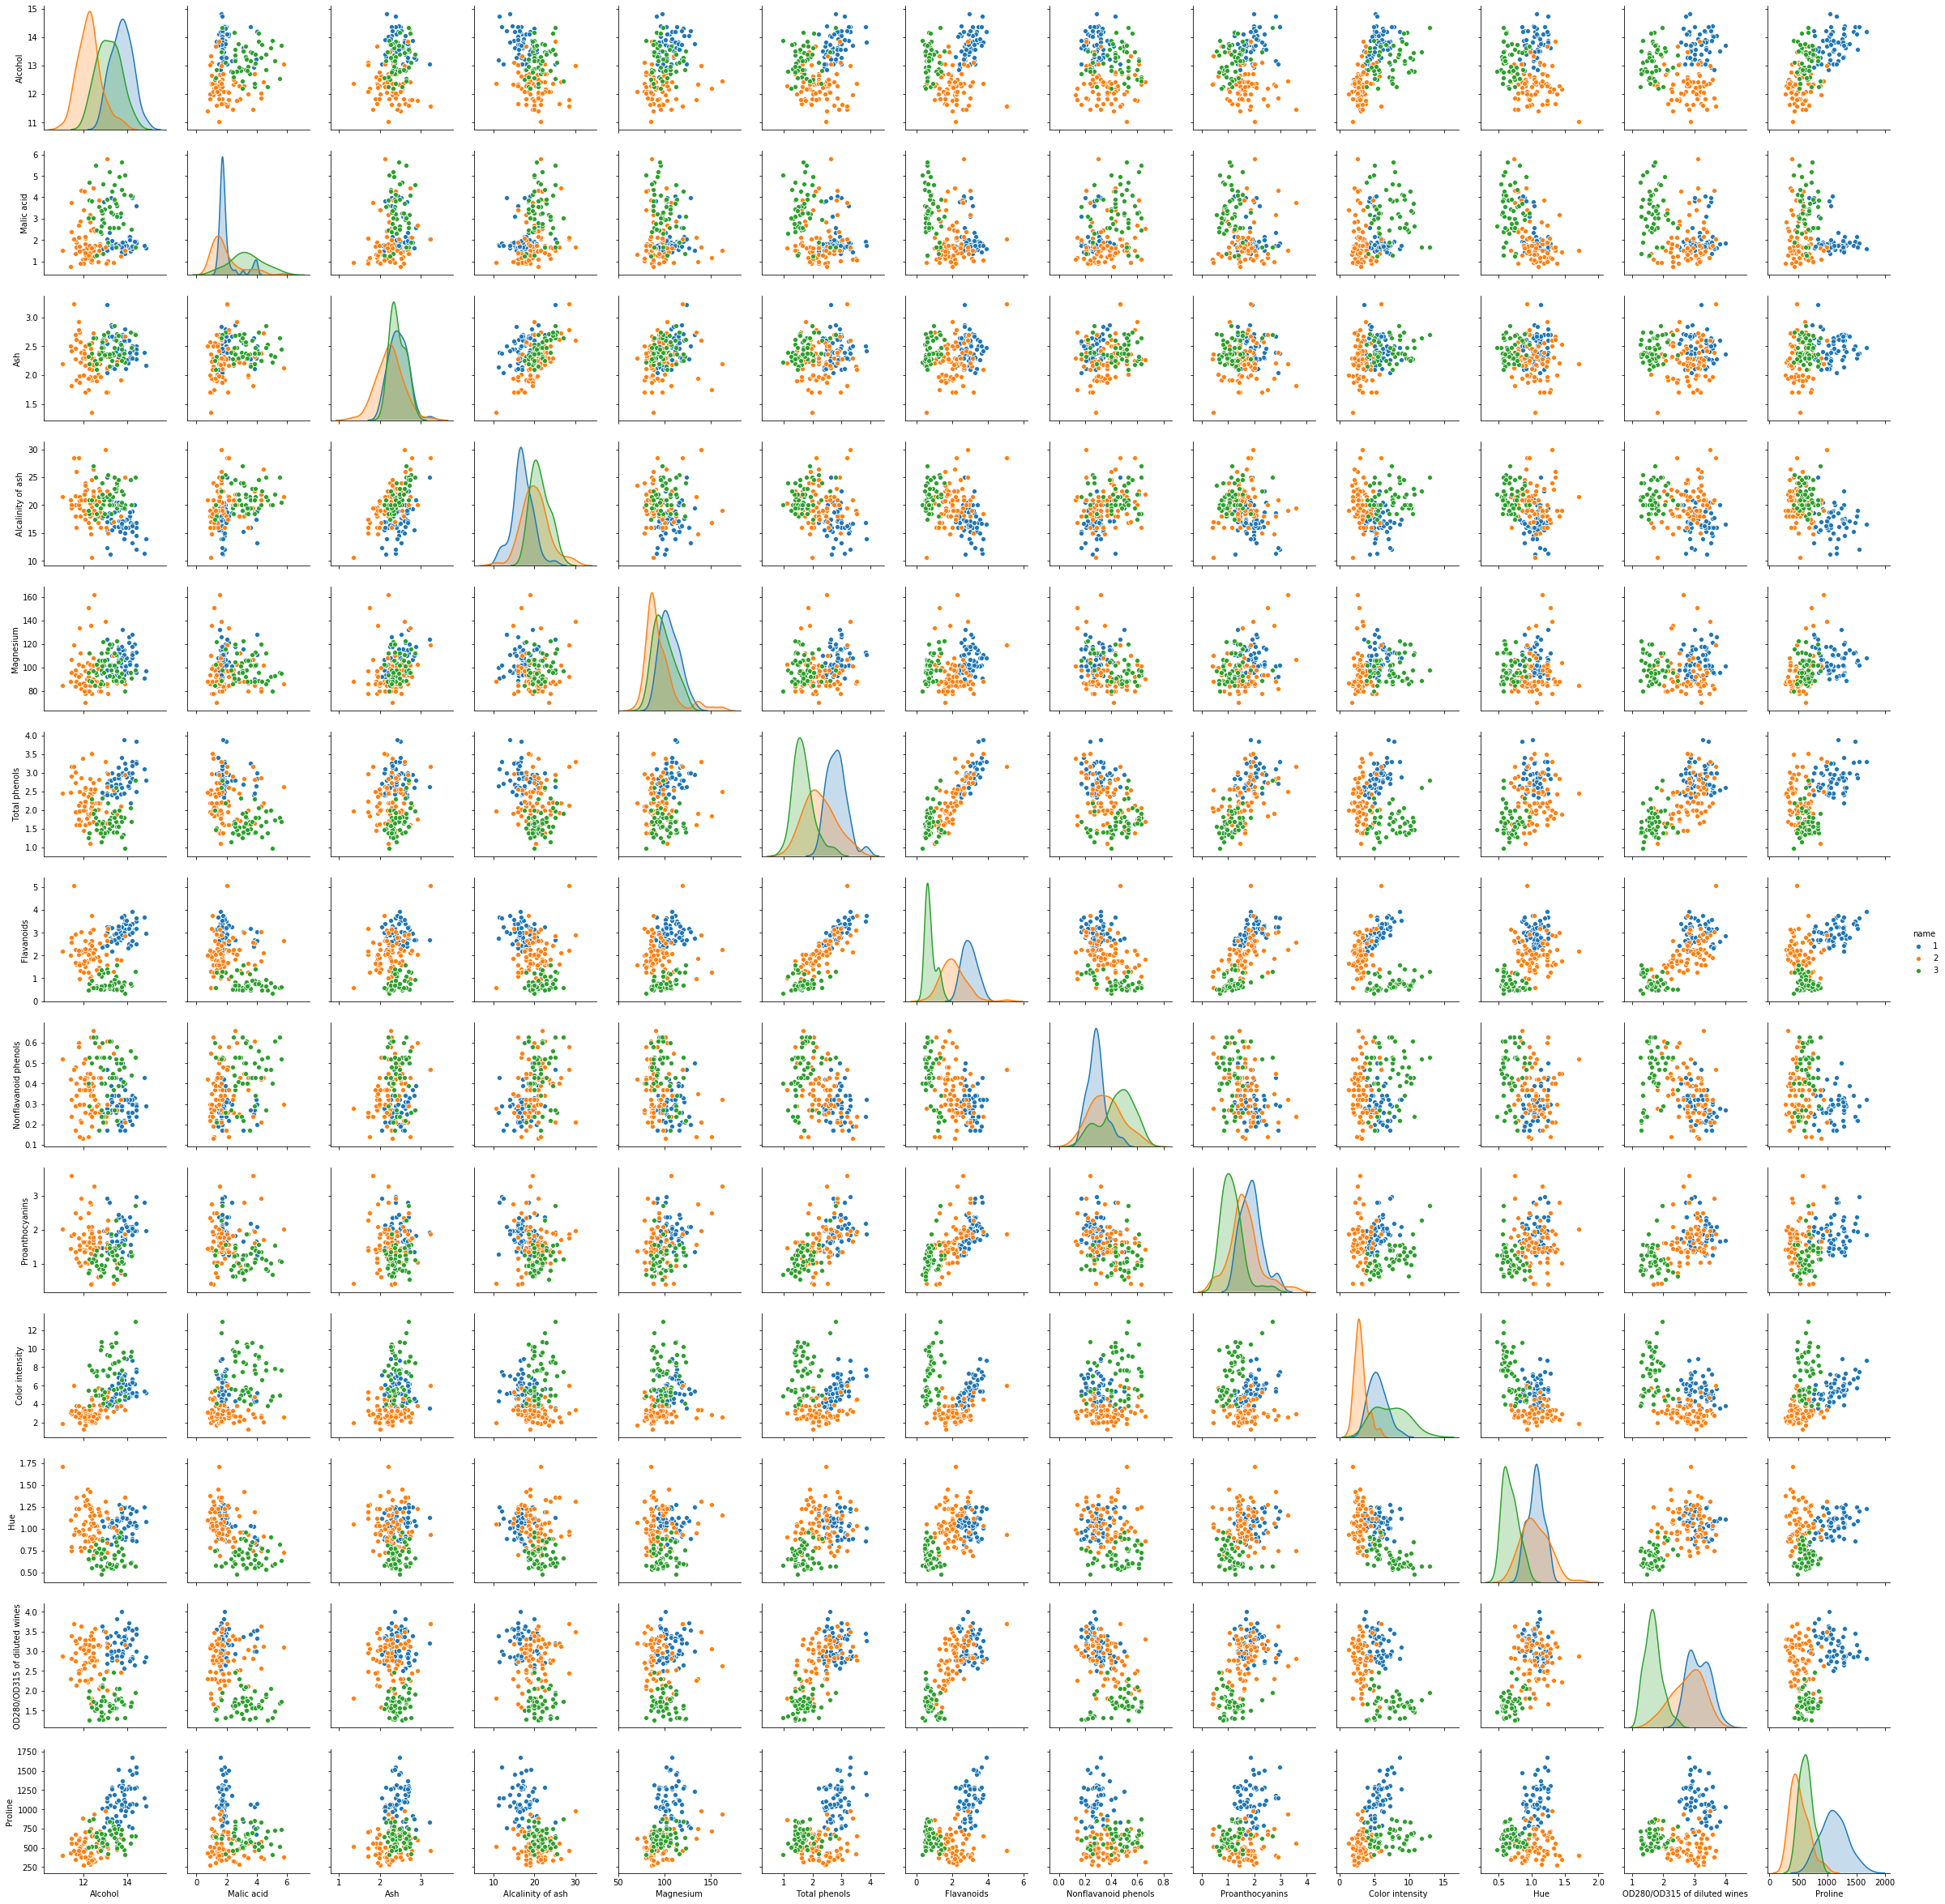

In [4]:
sns.pairplot(data=wine, hue='name')

In [5]:
data = wine[['name','Alcohol','OD280/OD315 of diluted wines']]
data.head()

,name,Alcohol,OD280/OD315 of diluted wines
0,1,13.20,3.40
1,1,13.16,3.17
2,1,14.37,3.45
3,1,13.24,2.93
4,1,14.20,2.85


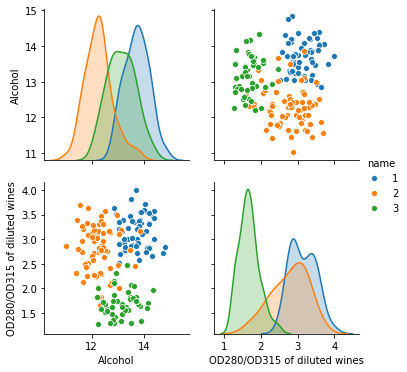

In [6]:
sns.pairplot(data=data, hue='name')

### 5) Train-Test Split

In [7]:
X = data.iloc[:,1:]
Y = data.iloc[:,:1]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)

(123, 2)
(54, 2)


### 6) LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train.values.ravel())

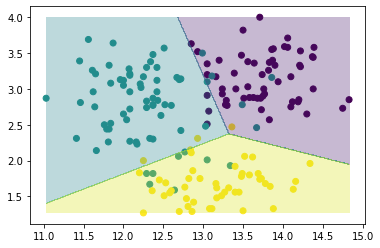

In [9]:
plt.scatter(data=data, x='Alcohol', y='OD280/OD315 of diluted wines', c='name')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['Alcohol'].min(), X['Alcohol'].max(), grid_size),
                   np.linspace(X['OD280/OD315 of diluted wines'].min(), X['OD280/OD315 of diluted wines'].max(), grid_size))
C = lda.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

### 7) QDA

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train.values.ravel())

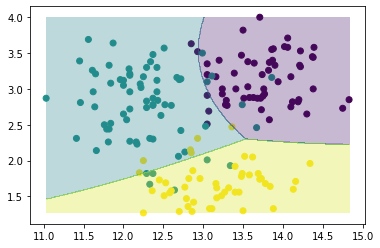

In [11]:
plt.scatter(data=data, x='Alcohol', y='OD280/OD315 of diluted wines', c='name')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['Alcohol'].min(), X['Alcohol'].max(), grid_size),
                   np.linspace(X['OD280/OD315 of diluted wines'].min(), X['OD280/OD315 of diluted wines'].max(), grid_size))
C = qda.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

### 8) Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto').fit(X_train, Y_train.values.ravel())

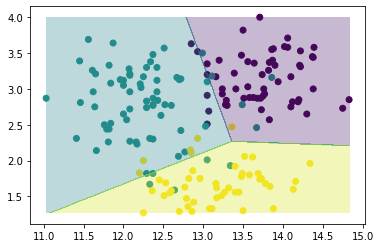

In [13]:
plt.scatter(data=data, x='Alcohol', y='OD280/OD315 of diluted wines', c='name')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['Alcohol'].min(), X['Alcohol'].max(), grid_size),
                   np.linspace(X['OD280/OD315 of diluted wines'].min(), X['OD280/OD315 of diluted wines'].max(), grid_size))
C = logistic.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

### 9) Logistic Regression with Feature Extraction

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(X_train)
    log = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto')
    kcv_score = cross_val_score(log, X_poly, Y_train.values.ravel(), cv=5) 
    print('kcv_score when degree =',i, ':', round(kcv_score.mean(),3))

kcv_score when degree = 1 : 0.895
kcv_score when degree = 2 : 0.887
kcv_score when degree = 3 : 0.903


### 10) Model Comparison

In [15]:
print('LDA\'s Test score:', round(lda.score(X_test, Y_test.values.ravel()),4), '\n'
      'QDA\'s Test score:', round(qda.score(X_test, Y_test.values.ravel()),4), '\n'
      'Logistic Regression\'s Test score:', round(logistic.score(X_test, Y_test.values.ravel()),4))

LDA's Test score: 0.8519 
QDA's Test score: 0.8333 
Logistic Regression's Test score: 0.8148


LDA = Logistic Regression > QDA